In [1]:
import pandas as pd
import json
from utils import *
from agglo import *
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

In [2]:
f = open('collected_data.json')
data = json.load(f)
movie_names = []
for x in data.keys():
    movie_names.append(x)
    
movie_names.sort(key=lambda x:x[0])
#movie_names

In [3]:
def get_average(s,reviews):
    movie = reviews[s]
    comments = movie["Comments"]
    date_ratings = []
    for comment in comments:
        date = comment["Date"]
        format_of_date = "%d %B %Y"
        new_date = datetime.strptime(date,format_of_date)
        x = []
        x.append(new_date)
        x.append(comment["Rating"])
        date_ratings.append(x)
    date_ratings.sort(key=lambda x:x[0])
    date_ratings_moving_avg = []
    total_rating = 0
    count_rating = 0;
    for comment in date_ratings:
        total_rating = total_rating + comment[1]
        count_rating = count_rating + 1
        average = total_rating/count_rating
        x = []
        x.append(comment[0])
        x.append(average)
        date_ratings_moving_avg.append(x)
    return date_ratings_moving_avg

In [4]:
def get_moving_average(s,reviews,alpha):
    movie = reviews[s]
    comments = movie["Comments"]
    date_ratings = []
    for comment in comments:
        date = comment["Date"]
        format_of_date = "%d %B %Y"
        new_date = datetime.strptime(date,format_of_date)
        x = []
        x.append(new_date)
        x.append(comment["Rating"])
        date_ratings.append(x)
    date_ratings.sort(key=lambda x:x[0])
    date_ratings_moving_avg = []
    average_till_now = 0
    for comment in date_ratings:
        if len(date_ratings_moving_avg)==0:
            date_ratings_moving_avg.append(comment)
            average_till_now = comment[1]
        else:
            average_till_now = alpha*comment[1] + (1-alpha)*average_till_now
            x = []
            x.append(comment[0])
            x.append(average_till_now)
            date_ratings_moving_avg.append(x)
    return date_ratings_moving_avg

In [16]:
def get_moving_average_days(s,reviews,days_interval):
    movie = reviews[s]
    comments = movie["Comments"]
    date_ratings = []
    for comment in comments:
        date = comment["Date"]
        format_of_date = "%d %B %Y"
        new_date = datetime.strptime(date,format_of_date)
        x = []
        x.append(new_date)
        x.append(comment["Rating"])
        date_ratings.append(x)
    date_ratings.sort(key=lambda x:x[0])
    date_ratings_moving_avg = []
    sum_till_now = 0
    count_till_now = 0
    queue = []
    for comment in date_ratings:
        if len(queue) == 0:
            queue.append(comment)
            sum_till_now = comment[1]
            count_till_now = count_till_now + 1
        else:
            while len(queue)>0 and (comment[0]-queue[0][0]).days > days_interval:
                x = queue.pop(0)
                sum_till_now = sum_till_now - x[1]
                count_till_now = count_till_now - 1
            queue.append(comment)
            sum_till_now = sum_till_now + comment[1]
            count_till_now = count_till_now + 1
            new_comment = []
            new_comment.append(comment[0])
            new_comment.append(sum_till_now/count_till_now)
            date_ratings_moving_avg.append(new_comment)
    return date_ratings_moving_avg

In [17]:
def graph_of_data(data1,data2,title):
    x1 = []
    x2 = []
    y = []
    for d in data1:
        x1.append(d[1])
        y.append(d[0])
    for d in data2:
        x2.append(d[1]-0.25)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(16,9))
    plt.plot(y,x1,color='orange',label='IMDB Rating')
    plt.plot(y,x2,color='black',label='Model Rating')
    plt.xlabel('Date')
    plt.ylabel('Rating')
    plt.title(title)
    plt.savefig(title,transparent=False)

In [18]:
def plot_graph(data1,title):
    x = []
    y = []
    for d in data1:
        x.append(d[1])
        y.append(d[0])
    plt.rcParams.update({'font.size':22})
    plt.figure(figsize=(16,9))
    plt.plot(y,x,color='black',label='IMDB Rating')
    plt.xlabel('Date')
    plt.ylabel('Rating')
    plt.title(title)

In [ ]:
# Godzilla = 0.1 0.08 -0.2
# Men in Black 2 = 0.2 0.1 +0.2
# Mission Impossible 2 = 0.2 0.15 +0.2

name = "Mission: Impossible II"
plot_data_IMDB = get_moving_average(name,data,0.2)
plot_data_Model = get_moving_average(name,data,0.1)
graph_of_data(plot_data_IMDB,plot_data_Model,name)

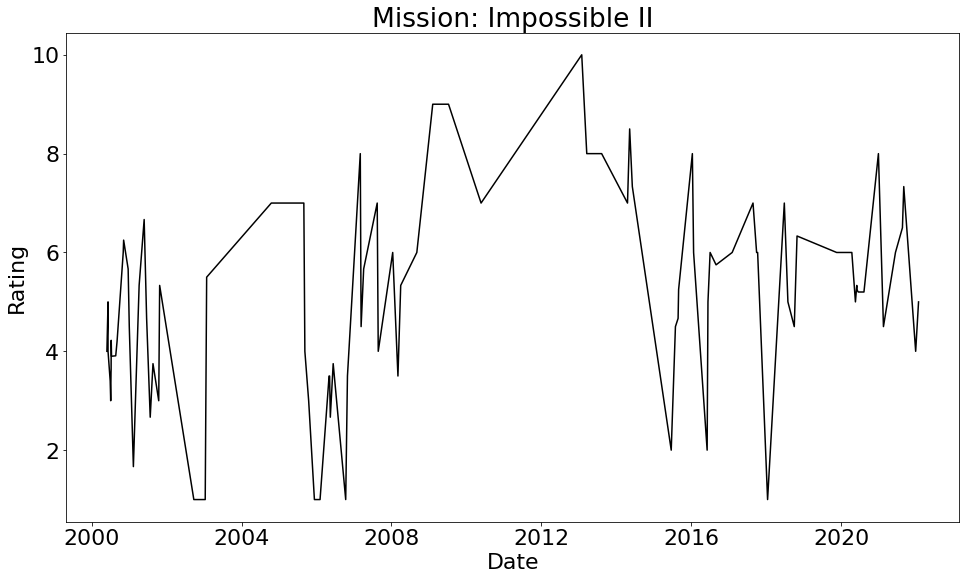

In [24]:
name = "Mission: Impossible II"
plot_data_IMDB = get_moving_average_days(name,data,90)
plot_graph(plot_data_IMDB,name)

In [ ]:
f = open("Final Graphs/Mission: Impossible II.txt","w+")
for d in plot_data_Model:
    f.write("{},{}\n".format(d[0],d[1]))
f.close()
    